<h1 align="center">Дашборд для отдела продаж авокадо в США</a>

<h3 align="center">Исходные данные</h3>


**Название: avocado**

**База: default**

**Столбцы:**
- Date — дата
- AveragePrice — средняя цена одного авокадо
- Total Volume — количество проданных авокадо
- 4046 — количество проданных авокадо PLU* 4046
- 4225 — количество проданных авокадо PLU 4225
- 4770 — количество проданных авокадо PLU 4770
- Total Bags — всего упаковок
- Small Bags — маленькие упаковки
- Large Bags — большие
- XLarge Bags — очень большие
- type — обычный или органический
- year — год
- Region — город или регион the city or region of the observation
- PLU — код товара (Product Lookup code) В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи

**Движок: MergeTree**

**Ключевые задачи**
- Проанализировать продажи в регионах SanFrancisco и NewYork
- Сравнить продажи в регионах SanFrancisco и NewYork с общими показателями по США

<h3 align="center">Построение дашборда</h3>

1.  Для начала, *сравним абсолютные показатели по общим объемам продаж авокадо в Сан-Франциско и Нью-Йорке*, отобразив их для наглядности на одном графике вместе с общими продажами авокадо в США. 

<h4> SQL-запрос

In [3]:
q1 = '''
    SELECT
        SUM(total_volume) AS total_volume_by_region,
        region
    FROM 
        {db}.avocado
    WHERE region in('SanFrancisco', 'NewYork', 'TotalUS')
    GROUP BY region
    '''

#### Визуализация

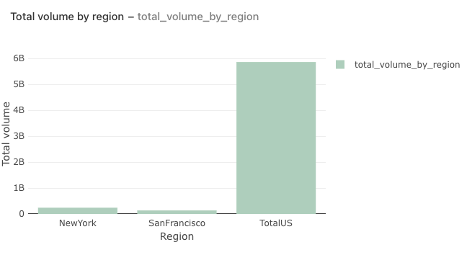

Из графика видно, что Нью-Йорк опережает Сан-Франциско по объемам продаж авокадо. При этом, также можно отметить их невысокую величину относительно общих продаж авокадо по стране.

2. Для понимания того, *какую долю* занимают продажи авокадо в Нью-Йорке и Сан-Франциско в общих продажах по США построим круговую диаграмму.

#### SQL-запрос

In [5]:
q1 = '''
    SELECT
        SUM(total_volume) AS total_volume_by_region,
        region
    FROM 
        {db}.avocado
    WHERE region in('SanFrancisco', 'NewYork', 'TotalUS')
    GROUP BY region
    '''

#### Визуализация

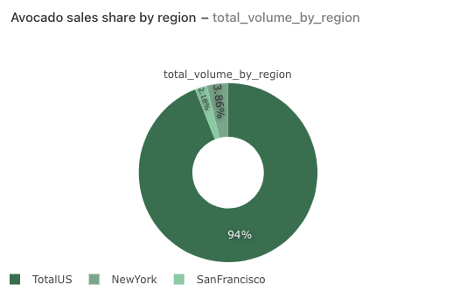

 3. Посмотрим *продажи авокадо в Нью-Йорке и Сан-Франциско по годам.*

#### SQL-запрос

In [1]:
q2 = '''
    SELECT
        year,
        region,
        SUM(total_volume) AS sum_total_volume
    FROM 
        default.avocado
    WHERE region in('SanFrancisco', 'NewYork')
    GROUP BY year, region
    LIMIT 1000
    '''

#### Визуализация

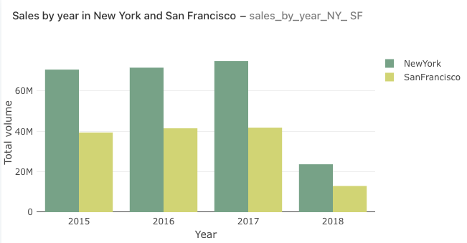

Видно, что пик объема продаж авокадо в двух городах приходится на 2017 год, что связано с возросшей модой на данный продукт. В свою очередь, резкое падение объема продаж авокадо произошло в 2018 году. 
- Оказывается, такая тенденция связана с экологическими и социально-экономическими проблемами в Мексике, которая является основным поставщиком авокадо в США. Для выращивания большего количества авокадо начали вырубать сосновые леса, уничтожая сложные экосистемы. Кроме того, в Мексике авокадовым бизнесом заинтересовались местные наркокартели, которые принялись «крышевать» фермеров.

4. *Общая тенденция продаж авокадо в США по годам* также отражает падение объемов продаж данного продукта в 2018 году

#### SQL-запрос

In [2]:
q3 = '''
    SELECT
        year,
        SUM(total_volume) AS sum_total_volume
    FROM 
        default.avocado
    WHERE region in('TotalUS')
    GROUP BY year
    LIMIT 1000
    '''

#### Визуализация

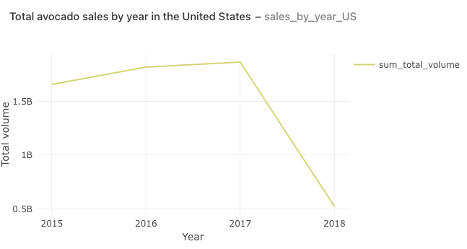

5. Посмотрим *абсолютные показатели ежегодных продаж авокадо по типам в США*

#### SQL-запрос

In [3]:
q4 = '''
    SELECT
        year,
        type,
        SUM(total_volume) AS sum_total_volume
    FROM 
        default.avocado
    WHERE region in('TotalUS')
    GROUP BY type, year
    LIMIT 1000
    '''

#### Визуализация

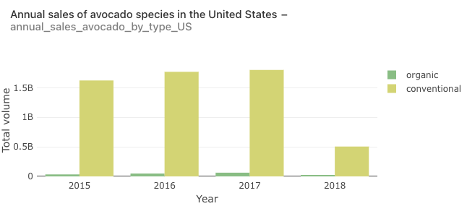

Видно, что лидером продаж является традиционное авокадо, выращенное в естественной среде.

6. *Разбивка по долям продаж типов авокадо* также отражает популярность традиционного авокадо у потребителей на протяжении всего рассматриваемого периода. В свою очередь, можно предположить, что такая любовь потребителей к авокадо, выращенному в естественной среде, и непопулярность эко-продукта послужили причиной возникновения проблем с авокадо в Мексике и снижения его дальнейшего потребления в США.

#### SQL-запрос

In [6]:
q4 = '''
    SELECT
        year,
        type,
        SUM(total_volume) AS sum_total_volume
    FROM 
        default.avocado
    WHERE region in('TotalUS')
    GROUP BY type, year
    LIMIT 1000
    '''

#### Визуализация

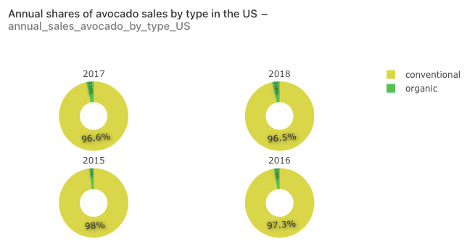

Таким образом, можно сделать вывод, что если бы потребители в США изначально отдавали свое предпочтение эко-авокадо, выращенному в искусственных условиях, проблем в 2018 году с его поставками и, как следствие, потреблением не было бы. Кроме того, выращивание авокадо таким способом не вызвало бы проблем с экологией, в частности, связанными с масштабной вырубкой леса. В связи с этим, отделу продаж авокадо в США стоит уделить внимание продвижению и популяризации эко-авокадо